In [1]:
!python --version

Python 3.11.11


In [2]:
%cd ..
%ls

c:\Auto\traffic
 Volume in drive C is Windows
 Volume Serial Number is C240-4FA2

 Directory of c:\Auto\traffic

12/28/2025  01:42 PM    <DIR>          .
12/21/2025  03:07 PM    <DIR>          ..
12/26/2025  01:11 PM               168 .gitignore
12/21/2025  03:43 PM    <DIR>          .vscode
12/22/2025  01:45 PM    <DIR>          __pycache__
12/21/2025  03:07 PM               412 base_result
12/21/2025  03:07 PM             2,391 clean.py
12/23/2025  12:12 PM           146,345 comparison.png
12/21/2025  03:07 PM    <DIR>          config
12/27/2025  08:14 AM             2,187 main.py
12/21/2025  03:07 PM               789 model.py
12/22/2025  02:29 PM    <DIR>          models
12/29/2025  11:01 PM    <DIR>          output
12/21/2025  04:24 PM            16,436 pipelineV11.py
12/21/2025  04:49 PM            20,698 pipelineV7.py
12/21/2025  04:20 PM             2,560 README.md
12/27/2025  07:35 AM             2,168 requirements.txt
12/27/2025  07:38 AM    <DIR>          runs
12/21/2025  04

In [5]:
import os

folders = os.listdir('./output')
perform_files = []
for folder in folders:
    f = os.path.join('./output', folder, 'performance.json')
    perform_files.append(f)

perform_files

['./output\\south_skip_0_1\\performance.json',
 './output\\south_skip_0_2\\performance.json',
 './output\\south_skip_0_3\\performance.json',
 './output\\south_skip_0_4\\performance.json',
 './output\\south_skip_0_5\\performance.json',
 './output\\south_skip_2_1\\performance.json',
 './output\\south_skip_2_2\\performance.json',
 './output\\south_skip_2_3\\performance.json',
 './output\\south_skip_2_4\\performance.json',
 './output\\south_skip_2_5\\performance.json']

In [ ]:
perform_file = 

In [28]:
import json

totals = [26, 12.05]
performance_files = ["output\south_skip_0\performance.json", "output\south_skip_2\performance.json"]
performances = []
for perform_file in performance_files:
    with open(perform_file, mode='r') as f:
        data = json.load(f)
        performances.append(data)

In [26]:
list(performances[0].keys())

['preprocess_time', 'inference_time', 'tracking_time']

SKIP FRAME = 0

Run 1
total time: 32.54 s | frames: 1600 | fps: 49
-  pre-process  time: 9.09 s
-  inference    time: 9.11 s
-  tracking     time: 4.55 s
-  post-process time: 9.79 s
exclude pre-process: 68 fps

Run 2
total time: 30.40 s | frames: 1600 | fps: 52
-  pre-process  time: 7.19 s
-  inference    time: 8.18 s
-  tracking     time: 4.22 s
-  post-process time: 10.80 s
exclude pre-process: 68 fps

Run 3
total time: 24.60 s | frames: 1600 | fps: 65
-  pre-process  time: 5.67 s
-  inference    time: 6.81 s
-  tracking     time: 4.27 s
-  post-process time: 7.84 s
exclude pre-process: 84 fps

Run 4
total time: 28.92 s | frames: 1600 | fps: 55
-  pre-process  time: 7.07 s
-  inference    time: 7.66 s
-  tracking     time: 4.52 s
-  post-process time: 9.67 s
exclude pre-process: 73 fps

Run 5
total time: 26.81 s | frames: 1600 | fps: 59
-  pre-process  time: 6.15 s
-  inference    time: 7.31 s
-  tracking     time: 4.36 s
-  post-process time: 9.00 s
exclude pre-process: 77 fps

MEA

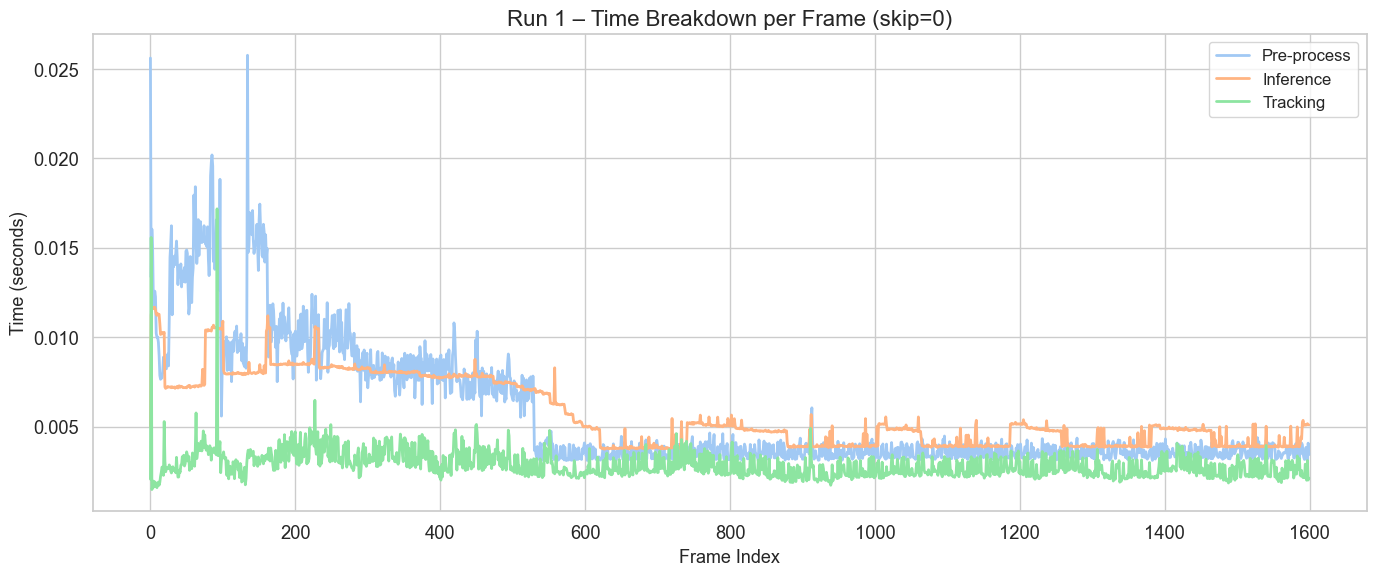

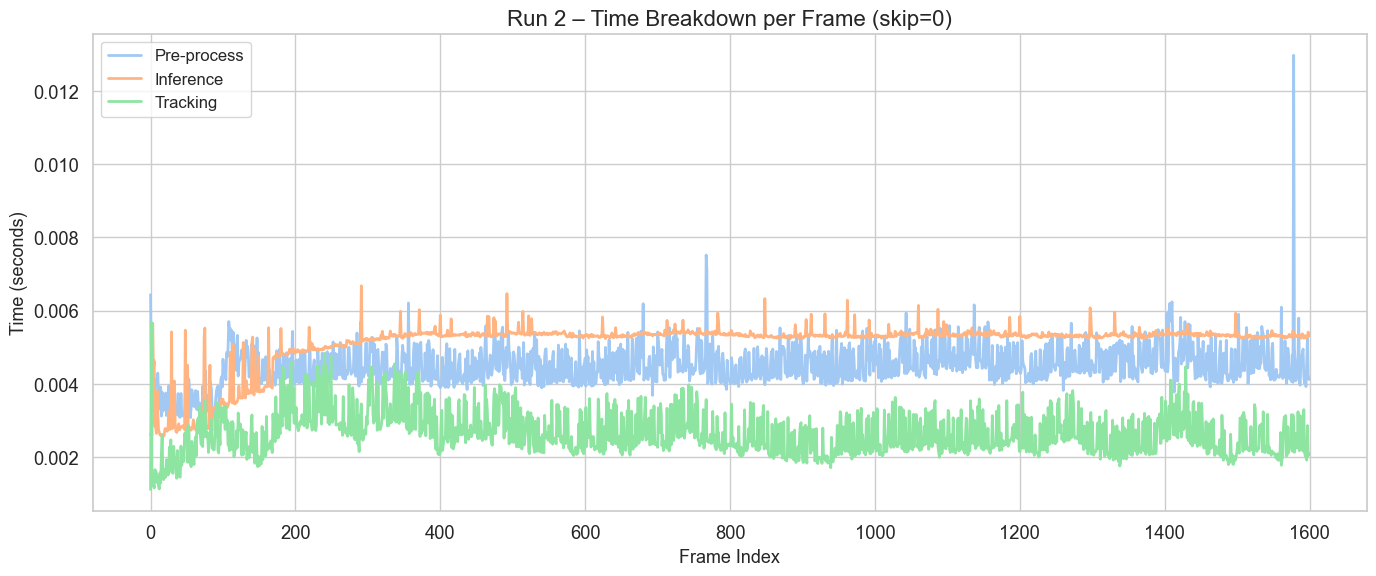

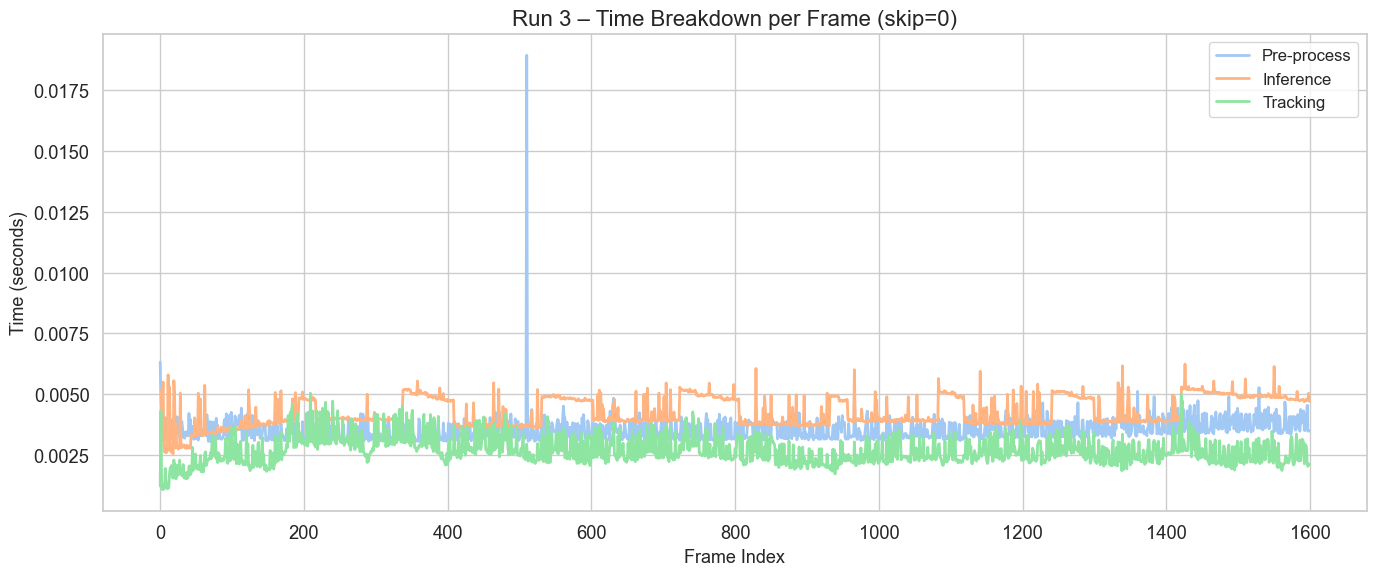

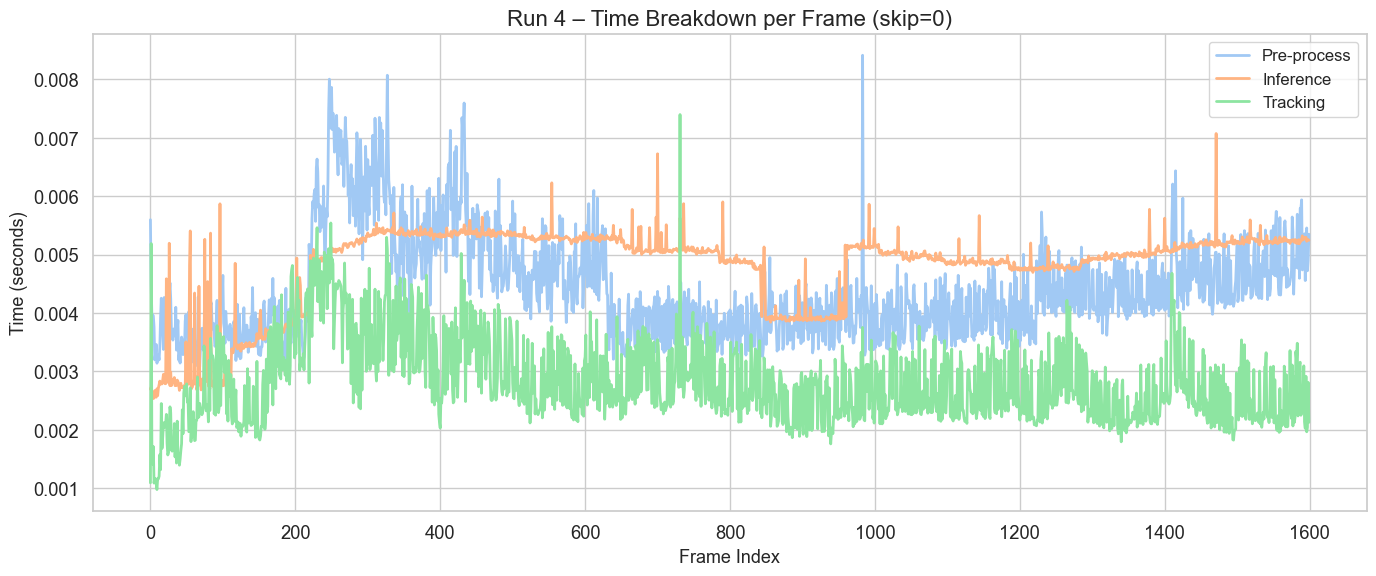

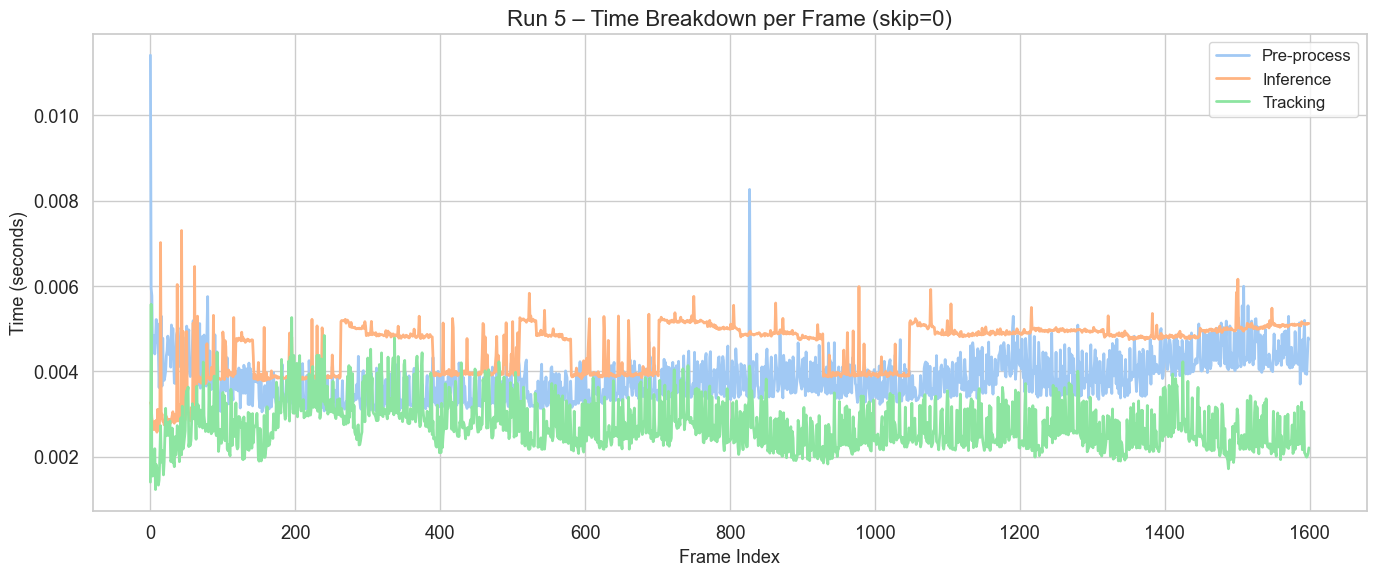

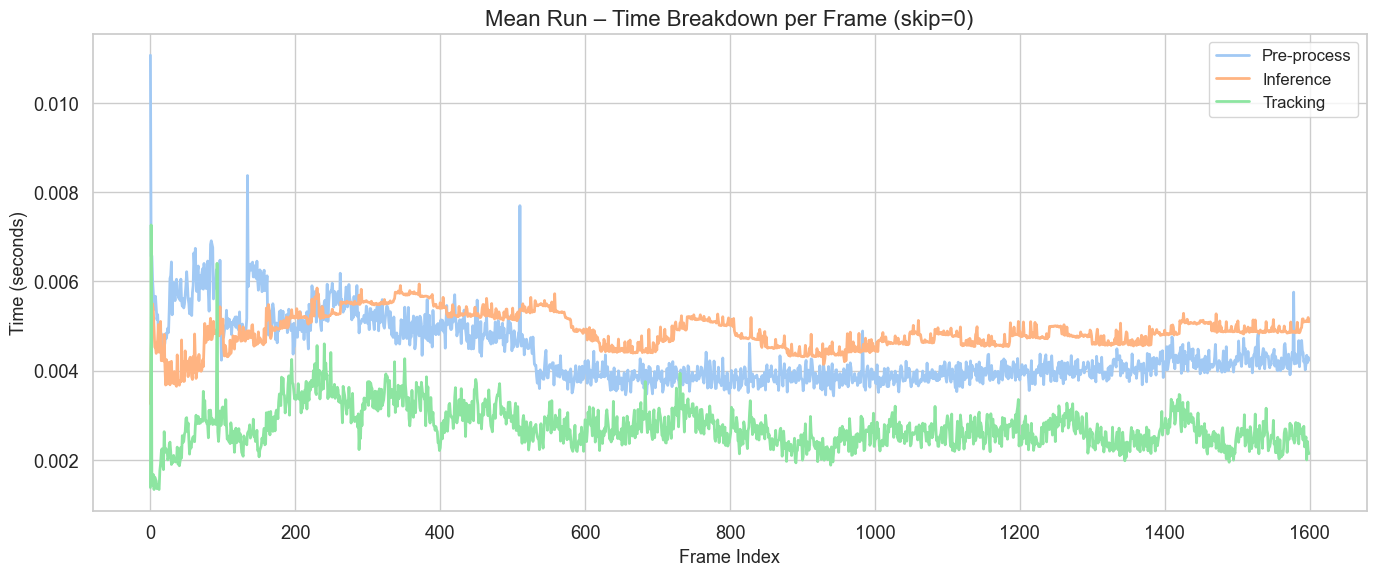

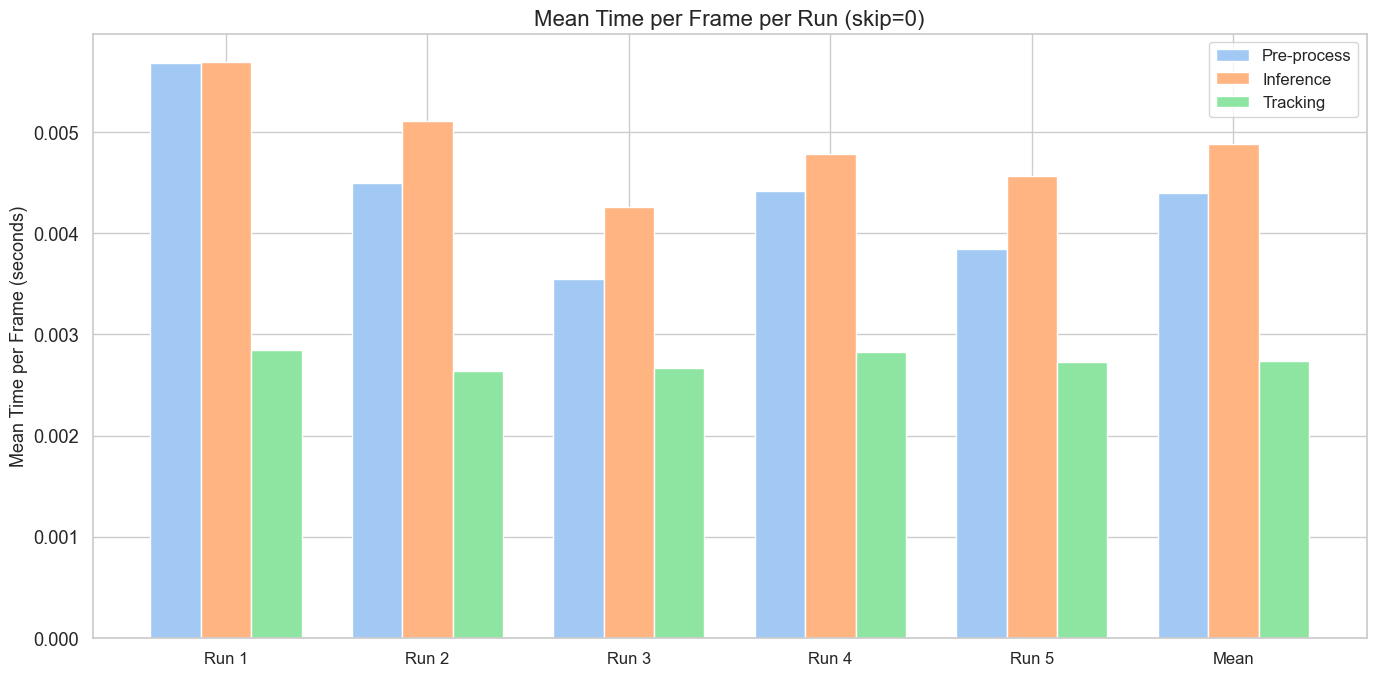

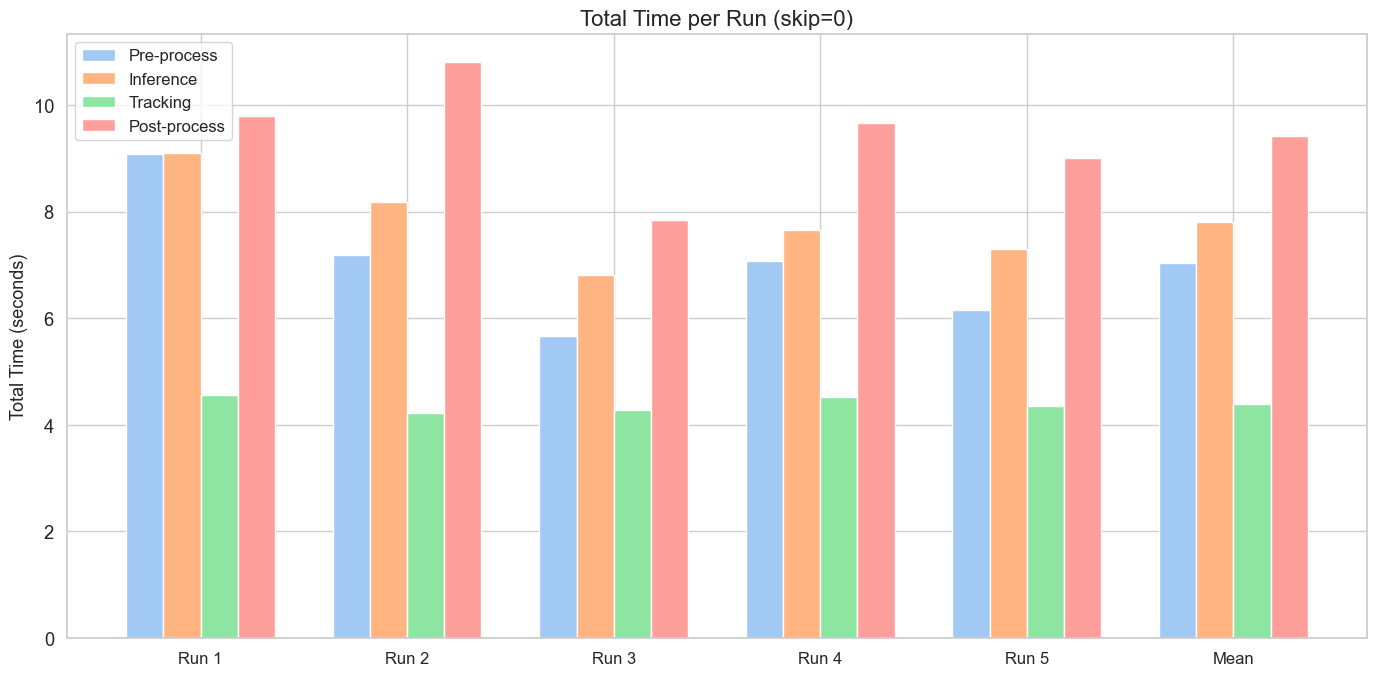

In [17]:
import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    font_scale=1.2
)

OUTPUT_DIR = "./output"
SELECT_SKIP = 0   # 0 = no skip, 1 = skip frame

pattern = re.compile(r"skip_(\d+)_(\d+)")

# ------------------------------------------------------------
# Load runs
# ------------------------------------------------------------
runs = []

for folder in sorted(os.listdir(OUTPUT_DIR)):
    m = pattern.search(folder)
    if not m:
        continue

    if int(m.group(1)) != SELECT_SKIP:
        continue

    path = os.path.join(OUTPUT_DIR, folder, "performance.json")
    if not os.path.exists(path):
        continue

    with open(path, "r") as f:
        perf = json.load(f)

    pre = np.array(perf["preprocess_time"])
    inf = np.array(perf["inference_time"])
    trk = np.array(perf["tracking_time"])
    total = perf["total_time"]
    post = total - (pre.sum() + inf.sum() + trk.sum())

    runs.append({"pre": pre, "inf": inf, "trk": trk, "post": post, "total": total})

assert len(runs) == 5, "Expected 5 runs"

# ------------------------------------------------------------
# Trace output (UNCHANGED)
# ------------------------------------------------------------
print("=" * 60)
print(f"SKIP FRAME = {SELECT_SKIP}")

for i, r in enumerate(runs):
    frames = len(r["pre"])
    fps = frames / r["total"]
    fps_ex_pre = frames / (r["inf"].sum() + r["trk"].sum() + r["post"])

    print(f"\nRun {i+1}")
    print(f"total time: {r['total']:.2f} s | frames: {frames} | fps: {int(fps)}")
    print(f"-  pre-process  time: {r['pre'].sum():.2f} s")
    print(f"-  inference    time: {r['inf'].sum():.2f} s")
    print(f"-  tracking     time: {r['trk'].sum():.2f} s")
    print(f"-  post-process time: {r['post']:.2f} s")
    print(f"exclude pre-process: {int(fps_ex_pre)} fps")

mean_total = np.mean([r["total"] for r in runs])
mean_pre = np.mean([r["pre"].sum() for r in runs])
mean_inf = np.mean([r["inf"].sum() for r in runs])
mean_trk = np.mean([r["trk"].sum() for r in runs])
mean_post = np.mean([r["post"] for r in runs])
mean_frames = int(np.mean([len(r["pre"]) for r in runs]))

mean_fps = mean_frames / mean_total
mean_fps_ex_pre = mean_frames / (mean_inf + mean_trk + mean_post)

print("\n" + "=" * 60)
print("MEAN OVER ALL RUNS")
print(f"total time: {mean_total:.2f} s | frames: {mean_frames} | fps: {int(mean_fps)}")
print(f"-  pre-process  time: {mean_pre:.2f} s")
print(f"-  inference    time: {mean_inf:.2f} s")
print(f"-  tracking     time: {mean_trk:.2f} s")
print(f"-  post-process time: {mean_post:.2f} s")
print(f"exclude pre-process: {int(mean_fps_ex_pre)} fps")

# ------------------------------------------------------------
# Mean run (frame-aligned)
# ------------------------------------------------------------
min_len = min(len(r["pre"]) for r in runs)

mean_run = {
    "pre": np.mean([r["pre"][:min_len] for r in runs], axis=0),
    "inf": np.mean([r["inf"][:min_len] for r in runs], axis=0),
    "trk": np.mean([r["trk"][:min_len] for r in runs], axis=0),
    "post": np.mean([r["post"] for r in runs]),
}

# ------------------------------------------------------------
# Line graphs (6 figures, NO post-process)
# ------------------------------------------------------------
def plot_lines(title, pre, inf, trk):
    plt.figure(figsize=(14, 6))
    plt.plot(pre, label="Pre-process", linewidth=2)
    plt.plot(inf, label="Inference", linewidth=2)
    plt.plot(trk, label="Tracking", linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel("Frame Index", fontsize=13)
    plt.ylabel("Time (seconds)", fontsize=13)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

for i, r in enumerate(runs):
    plot_lines(
        f"Run {i+1} – Time Breakdown per Frame (skip={SELECT_SKIP})",
        r["pre"], r["inf"], r["trk"]
    )

plot_lines(
    f"Mean Run – Time Breakdown per Frame (skip={SELECT_SKIP})",
    mean_run["pre"], mean_run["inf"], mean_run["trk"]
)

# ------------------------------------------------------------
# Bar graph (1 figure, INCLUDE post-process)
# ------------------------------------------------------------
labels = [f"Run {i+1}" for i in range(5)] + ["Mean"]

pre_bar = [r["pre"].mean() for r in runs]
inf_bar = [r["inf"].mean() for r in runs]
trk_bar = [r["trk"].mean() for r in runs]

# mean of runs (NOT post-process)
pre_bar.append(np.mean(pre_bar))
inf_bar.append(np.mean(inf_bar))
trk_bar.append(np.mean(trk_bar))

x = np.arange(len(labels))
w = 0.25

plt.figure(figsize=(14, 7))

plt.bar(x - w, pre_bar, w, label="Pre-process")
plt.bar(x,     inf_bar, w, label="Inference")
plt.bar(x + w, trk_bar, w, label="Tracking")

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Mean Time per Frame (seconds)", fontsize=13)
plt.title(f"Mean Time per Frame per Run (skip={SELECT_SKIP})", fontsize=16)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

labels = [f"Run {i+1}" for i in range(5)] + ["Mean"]

pre_bar = [r["pre"].sum() for r in runs] + [mean_run["pre"].sum()]
inf_bar = [r["inf"].sum() for r in runs] + [mean_run["inf"].sum()]
trk_bar = [r["trk"].sum() for r in runs] + [mean_run["trk"].sum()]
post_bar = [r["post"] for r in runs] + [mean_run["post"]]

x = np.arange(len(labels))
w = 0.18

plt.figure(figsize=(14, 7))
plt.bar(x - 1.5*w, pre_bar, w, label="Pre-process")
plt.bar(x - 0.5*w, inf_bar, w, label="Inference")
plt.bar(x + 0.5*w, trk_bar, w, label="Tracking")
plt.bar(x + 1.5*w, post_bar, w, label="Post-process")

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Total Time (seconds)", fontsize=13)
plt.title(f"Total Time per Run (skip={SELECT_SKIP})", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

SKIP FRAME = 2

Run 1
total time: 12.31 s | frames: 800 | fps: 64
-  pre-process  time: 2.80 s
-  inference    time: 3.34 s
-  tracking     time: 2.20 s
-  post-process time: 3.97 s
exclude pre-process: 84 fps

Run 2
total time: 12.24 s | frames: 800 | fps: 65
-  pre-process  time: 2.83 s
-  inference    time: 3.31 s
-  tracking     time: 2.19 s
-  post-process time: 3.91 s
exclude pre-process: 85 fps

Run 3
total time: 12.16 s | frames: 800 | fps: 65
-  pre-process  time: 2.76 s
-  inference    time: 3.30 s
-  tracking     time: 2.16 s
-  post-process time: 3.94 s
exclude pre-process: 85 fps

Run 4
total time: 12.14 s | frames: 800 | fps: 65
-  pre-process  time: 2.76 s
-  inference    time: 3.26 s
-  tracking     time: 2.19 s
-  post-process time: 3.93 s
exclude pre-process: 85 fps

Run 5
total time: 12.28 s | frames: 800 | fps: 65
-  pre-process  time: 2.79 s
-  inference    time: 3.29 s
-  tracking     time: 2.20 s
-  post-process time: 3.99 s
exclude pre-process: 84 fps

MEAN OVER

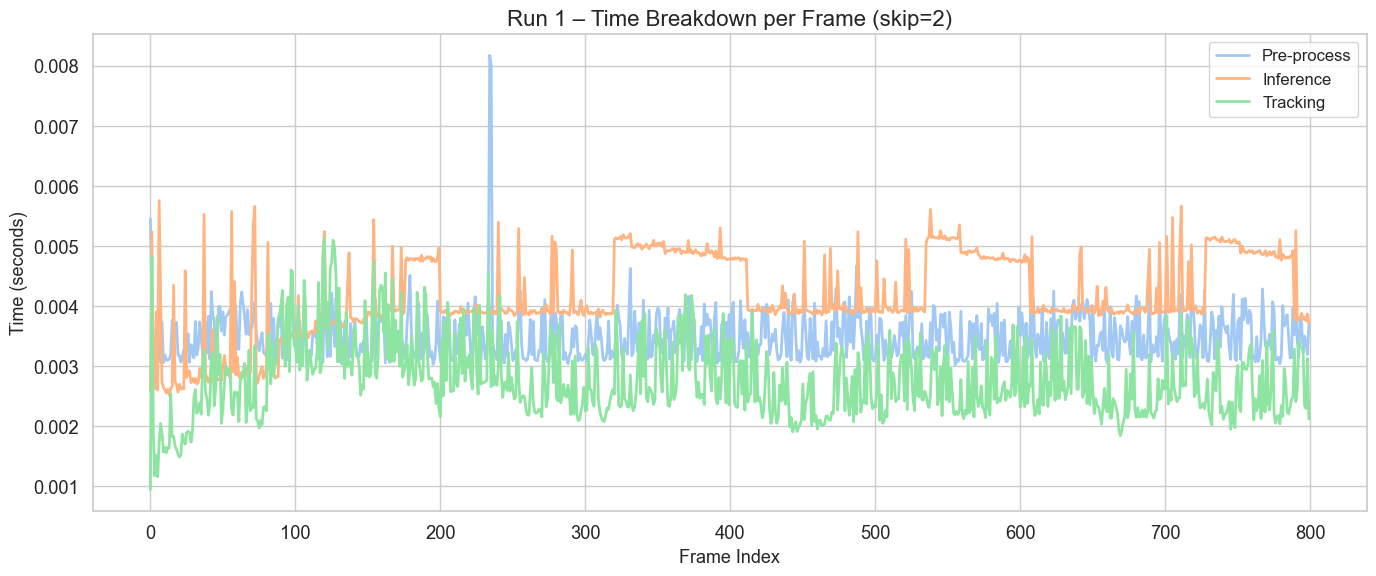

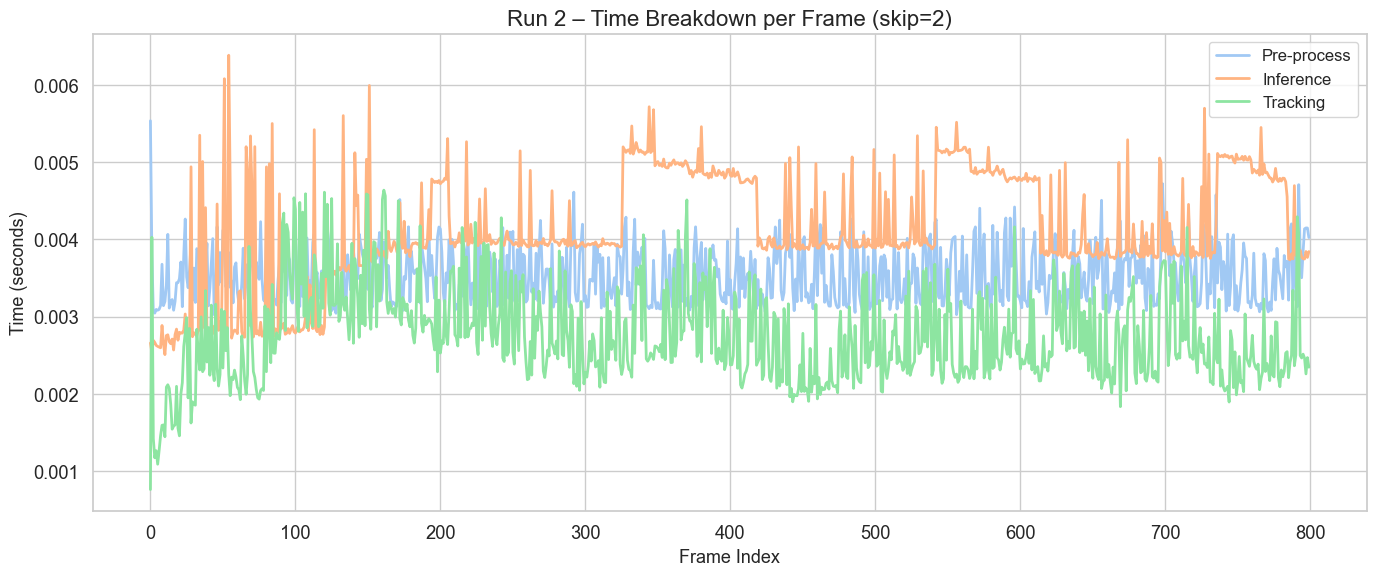

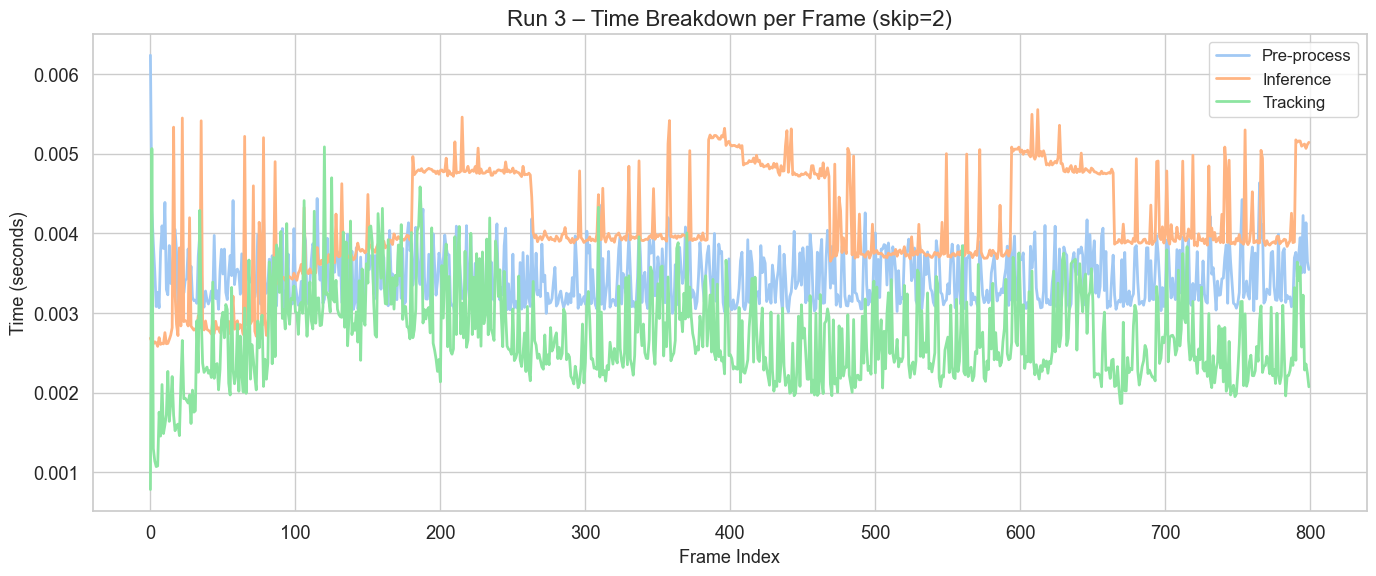

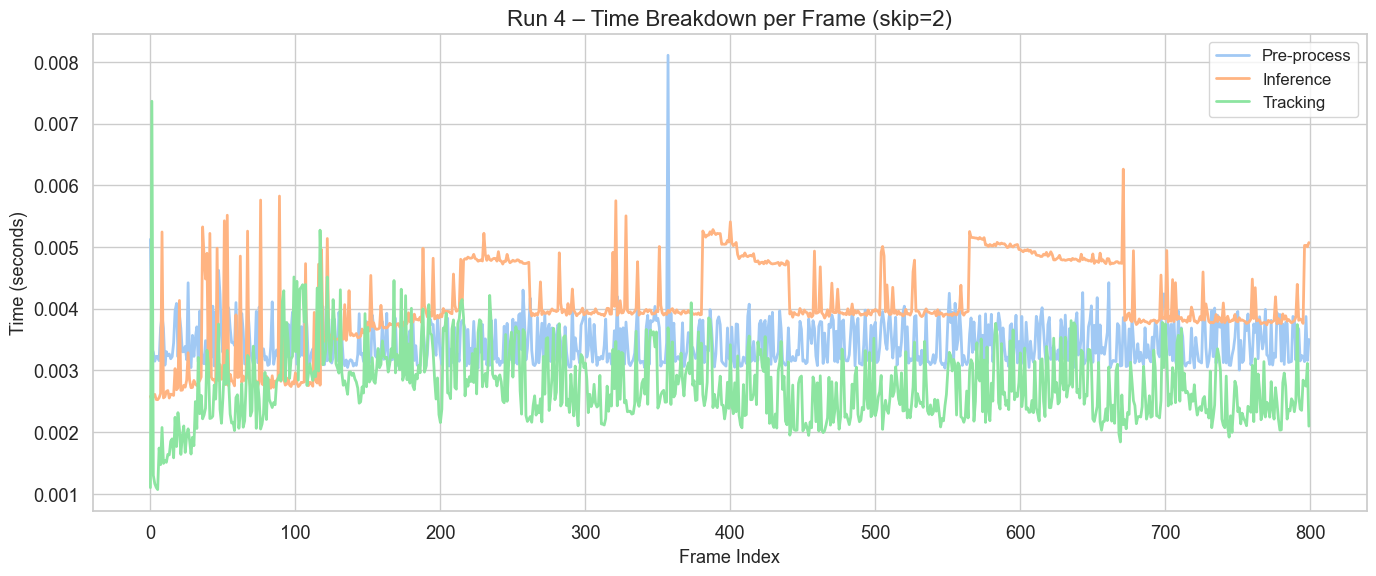

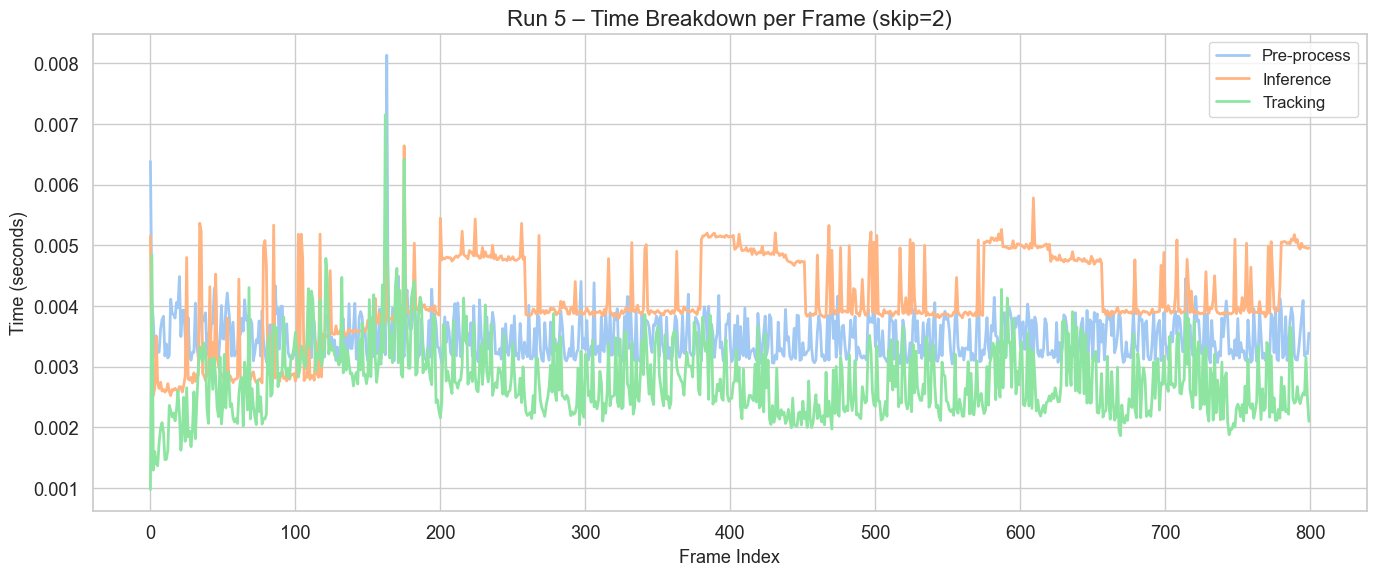

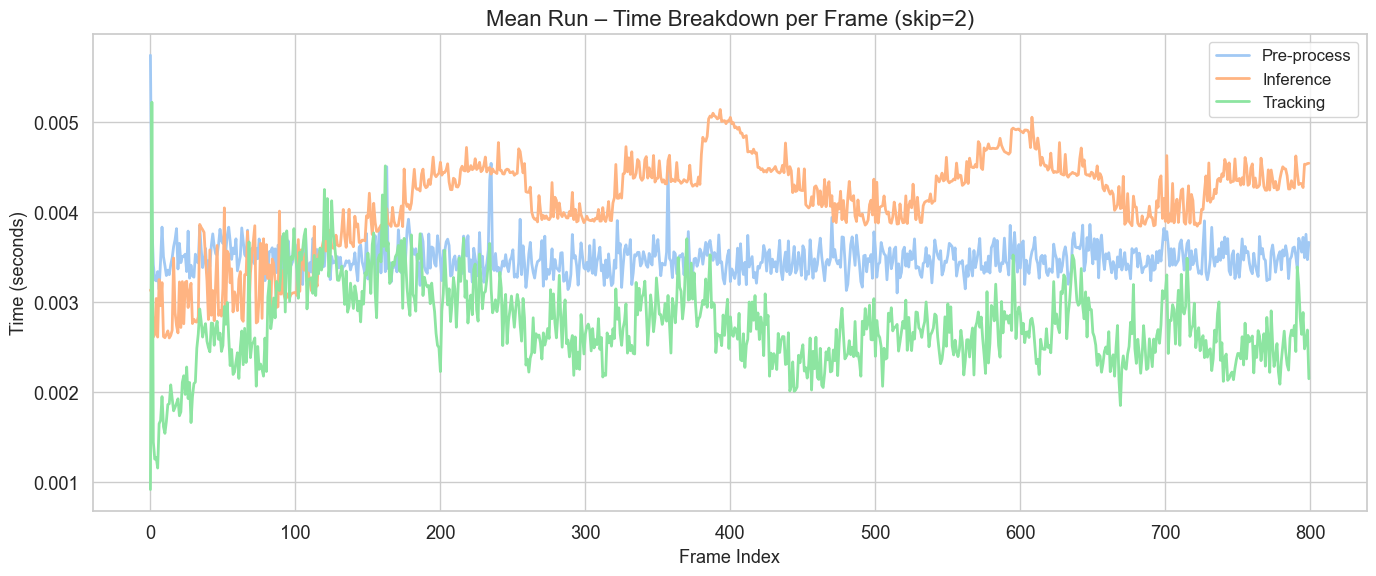

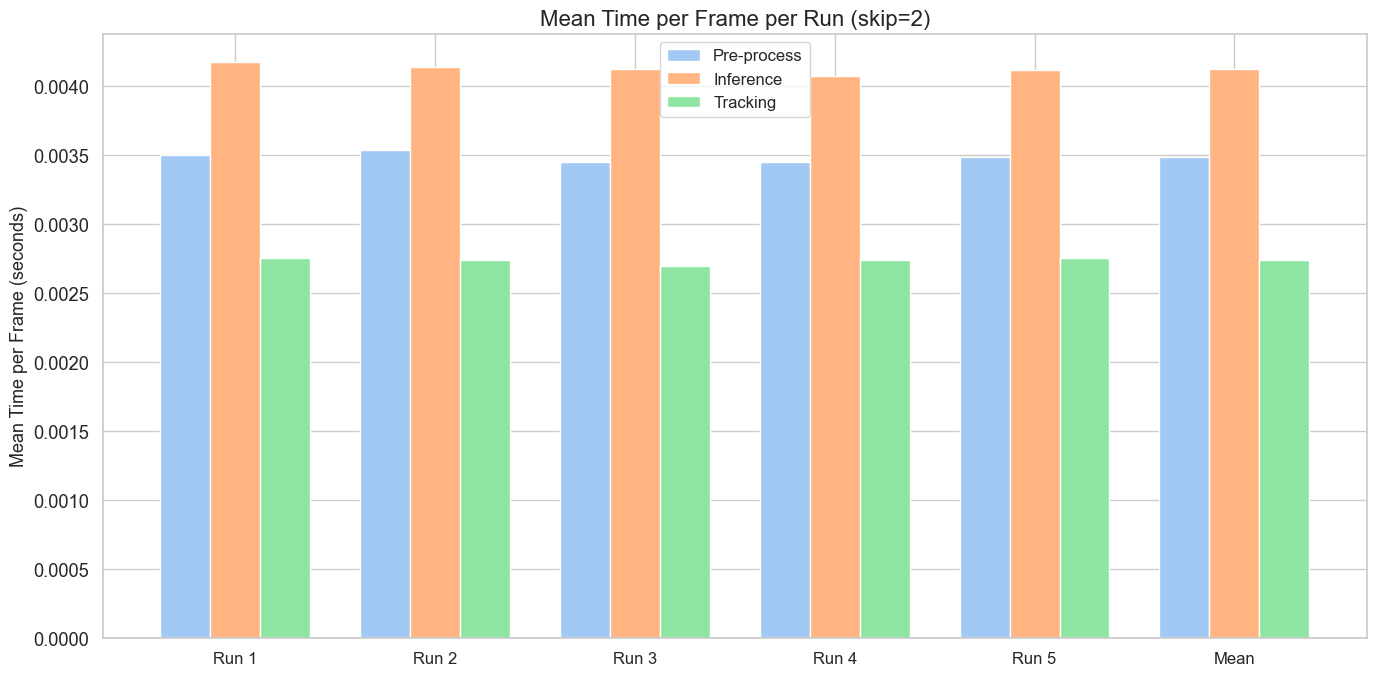

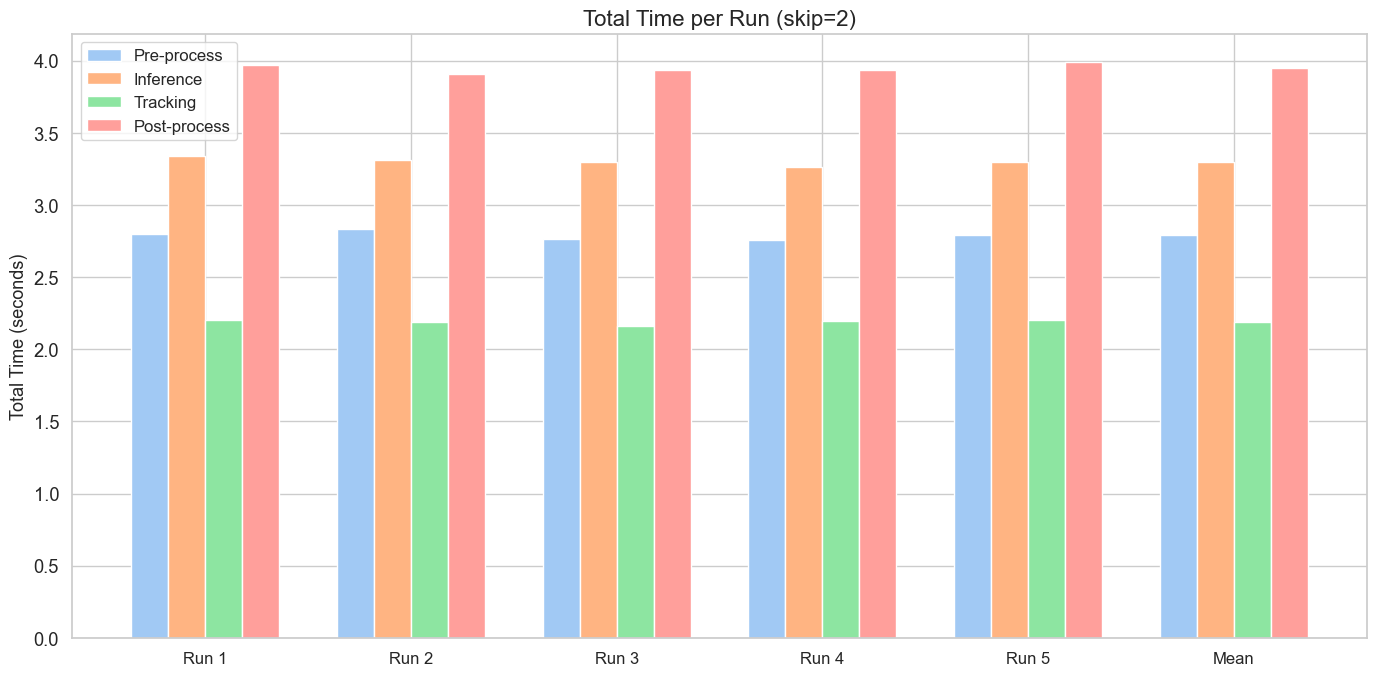

In [16]:
sns.set_theme(
    style="whitegrid",
    palette="pastel",
    font_scale=1.2
)

OUTPUT_DIR = "./output"
SELECT_SKIP = 2

pattern = re.compile(r"skip_(\d+)_(\d+)")

# ------------------------------------------------------------
# Load runs
# ------------------------------------------------------------
runs = []

for folder in sorted(os.listdir(OUTPUT_DIR)):
    m = pattern.search(folder)
    if not m:
        continue

    if int(m.group(1)) != SELECT_SKIP:
        continue

    path = os.path.join(OUTPUT_DIR, folder, "performance.json")
    if not os.path.exists(path):
        continue

    with open(path, "r") as f:
        perf = json.load(f)

    pre = np.array(perf["preprocess_time"])
    inf = np.array(perf["inference_time"])
    trk = np.array(perf["tracking_time"])
    total = perf["total_time"]
    post = total - (pre.sum() + inf.sum() + trk.sum())

    runs.append({"pre": pre, "inf": inf, "trk": trk, "post": post, "total": total})

assert len(runs) == 5, "Expected 5 runs"

# ------------------------------------------------------------
# Trace output (UNCHANGED)
# ------------------------------------------------------------
print("=" * 60)
print(f"SKIP FRAME = {SELECT_SKIP}")

for i, r in enumerate(runs):
    frames = len(r["pre"])
    fps = frames / r["total"]
    fps_ex_pre = frames / (r["inf"].sum() + r["trk"].sum() + r["post"])

    print(f"\nRun {i+1}")
    print(f"total time: {r['total']:.2f} s | frames: {frames} | fps: {int(fps)}")
    print(f"-  pre-process  time: {r['pre'].sum():.2f} s")
    print(f"-  inference    time: {r['inf'].sum():.2f} s")
    print(f"-  tracking     time: {r['trk'].sum():.2f} s")
    print(f"-  post-process time: {r['post']:.2f} s")
    print(f"exclude pre-process: {int(fps_ex_pre)} fps")

mean_total = np.mean([r["total"] for r in runs])
mean_pre = np.mean([r["pre"].sum() for r in runs])
mean_inf = np.mean([r["inf"].sum() for r in runs])
mean_trk = np.mean([r["trk"].sum() for r in runs])
mean_post = np.mean([r["post"] for r in runs])
mean_frames = int(np.mean([len(r["pre"]) for r in runs]))

mean_fps = mean_frames / mean_total
mean_fps_ex_pre = mean_frames / (mean_inf + mean_trk + mean_post)

print("\n" + "=" * 60)
print("MEAN OVER ALL RUNS")
print(f"total time: {mean_total:.2f} s | frames: {mean_frames} | fps: {int(mean_fps)}")
print(f"-  pre-process  time: {mean_pre:.2f} s")
print(f"-  inference    time: {mean_inf:.2f} s")
print(f"-  tracking     time: {mean_trk:.2f} s")
print(f"-  post-process time: {mean_post:.2f} s")
print(f"exclude pre-process: {int(mean_fps_ex_pre)} fps")

# ------------------------------------------------------------
# Mean run (frame-aligned)
# ------------------------------------------------------------
min_len = min(len(r["pre"]) for r in runs)

mean_run = {
    "pre": np.mean([r["pre"][:min_len] for r in runs], axis=0),
    "inf": np.mean([r["inf"][:min_len] for r in runs], axis=0),
    "trk": np.mean([r["trk"][:min_len] for r in runs], axis=0),
    "post": np.mean([r["post"] for r in runs]),
}

# ------------------------------------------------------------
# Line graphs (6 figures, NO post-process)
# ------------------------------------------------------------
def plot_lines(title, pre, inf, trk):
    plt.figure(figsize=(14, 6))
    plt.plot(pre, label="Pre-process", linewidth=2)
    plt.plot(inf, label="Inference", linewidth=2)
    plt.plot(trk, label="Tracking", linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel("Frame Index", fontsize=13)
    plt.ylabel("Time (seconds)", fontsize=13)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

for i, r in enumerate(runs):
    plot_lines(
        f"Run {i+1} – Time Breakdown per Frame (skip={SELECT_SKIP})",
        r["pre"], r["inf"], r["trk"]
    )

plot_lines(
    f"Mean Run – Time Breakdown per Frame (skip={SELECT_SKIP})",
    mean_run["pre"], mean_run["inf"], mean_run["trk"]
)

# ------------------------------------------------------------
# Bar graph (1 figure, INCLUDE post-process)
# ------------------------------------------------------------
labels = [f"Run {i+1}" for i in range(5)] + ["Mean"]

pre_bar = [r["pre"].mean() for r in runs]
inf_bar = [r["inf"].mean() for r in runs]
trk_bar = [r["trk"].mean() for r in runs]

# mean of runs (NOT post-process)
pre_bar.append(np.mean(pre_bar))
inf_bar.append(np.mean(inf_bar))
trk_bar.append(np.mean(trk_bar))

x = np.arange(len(labels))
w = 0.25

plt.figure(figsize=(14, 7))

plt.bar(x - w, pre_bar, w, label="Pre-process")
plt.bar(x,     inf_bar, w, label="Inference")
plt.bar(x + w, trk_bar, w, label="Tracking")

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Mean Time per Frame (seconds)", fontsize=13)
plt.title(f"Mean Time per Frame per Run (skip={SELECT_SKIP})", fontsize=16)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

labels = [f"Run {i+1}" for i in range(5)] + ["Mean"]

pre_bar = [r["pre"].sum() for r in runs] + [mean_run["pre"].sum()]
inf_bar = [r["inf"].sum() for r in runs] + [mean_run["inf"].sum()]
trk_bar = [r["trk"].sum() for r in runs] + [mean_run["trk"].sum()]
post_bar = [r["post"] for r in runs] + [mean_run["post"]]

x = np.arange(len(labels))
w = 0.18

plt.figure(figsize=(14, 7))
plt.bar(x - 1.5*w, pre_bar, w, label="Pre-process")
plt.bar(x - 0.5*w, inf_bar, w, label="Inference")
plt.bar(x + 0.5*w, trk_bar, w, label="Tracking")
plt.bar(x + 1.5*w, post_bar, w, label="Post-process")

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Total Time (seconds)", fontsize=13)
plt.title(f"Total Time per Run (skip={SELECT_SKIP})", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()